<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4 - Polynomial Regression</b></center>    
<pre>    

### Namra Pithwa
### 23010101641
### 20/12/2024

# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Read Data and define x and y

In [3]:
data = pd.read_csv("Position_Salaries.csv")
x = data.iloc[:,1:2].values
y = data.iloc[:,2].values

y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

# Plot the data using scatter plot

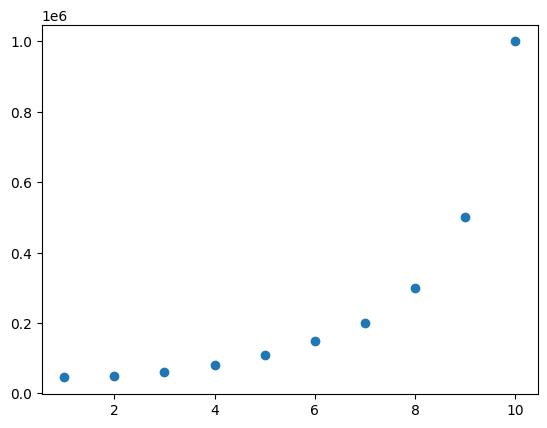

In [4]:
plt.scatter(x,y)

# Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# Fitting Linear Regression to the dataset

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Predict the x_test using Linear Model

In [7]:
lin_new_y =  lr.predict(X_test)
lin_new_y

array([ 44275.9295499 , 543473.58121331])

# Visualising the Linear Regression results

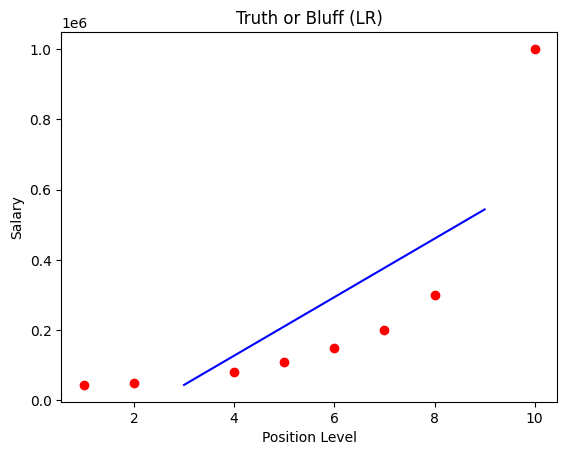

In [8]:
plt.scatter(X_train,y_train,color = 'Red')
plt.plot(X_test,lin_new_y,color='Blue')
plt.title("Truth or Bluff (LR)")
plt.xlabel("Position Level")
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset

## import  PolynomialFeatures

In [9]:
from sklearn.preprocessing import PolynomialFeatures

## create PolynomialFeatures of degree 4

In [10]:
poly_reg_pre = PolynomialFeatures(degree=4)

## Apply fit_transform to features

In [11]:
X_poly_train = poly_reg_pre.fit_transform(X_train)
poly_reg_pre.fit(X_poly_train,y_train)

PolynomialFeatures(degree=4)

## View new  Features

In [12]:
X_poly_train

array([[1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]])

## Fitting Polynomial Regression to the dataset

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

# Create Grid for higher resolution and smoother curve

In [14]:
X_grid = np.arange(min(X_test),max(X_test),0.1)
X_grid = X_grid.reshape((len(X_grid),1))

C:\Users\namra\AppData\Local\Temp\ipykernel_28092\2867203240.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_test),max(X_test),0.1)


In [15]:
X_grid

array([[3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
       [8.1],
       [8.2],
       [8.3],
       [8.4],
       [8.5],
       [8.6],
       [8.7],
       [8.8],
       [8.9]])

# Predict the x_test using Polynomial Regression

In [16]:
poly_new_y = poly_reg.predict(poly_reg_pre.fit_transform(X_grid))

# Visualising the Linear Regression results

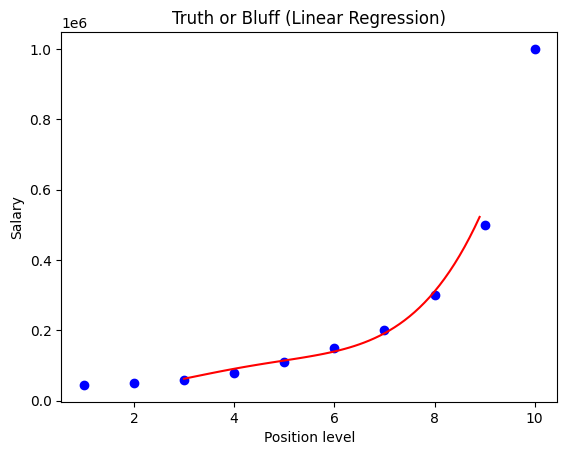

In [17]:
plt.scatter(x , y , color = 'b')
plt.plot(X_grid,poly_new_y , color = 'Red')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [18]:
new_y = poly_reg.predict(poly_reg_pre.fit_transform(X_test))

In [19]:
y_test

array([ 60000, 500000], dtype=int64)

In [20]:
lin_new_y

array([ 44275.9295499 , 543473.58121331])

In [21]:
new_y

array([ 62618.48984237, 554488.61683471])

In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
mean_squared_error(lin_new_y,y_test)*len(y_test)

2137198655.0296705

In [25]:
mean_squared_error(new_y,y_test)*2

2975865853.613907